<a href="https://colab.research.google.com/github/solarslurpi/GrowBuddies/blob/main/growbuddiesproject/growbuddies/drgrowbuddy/pre_processing_image_data_for_drgrowbuddy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[zipfile library documentation](https://docs.python.org/3/library/zipfile.html)
# Goals
The goals of this notebook:
- Identify a subset of images from the  [the PlantVillage Dataset in Papers With Code](https://paperswithcode.com/dataset/plantvillage). The subset of images is to include 1000 images of healthy plant leaves and 1000 images of unhealthy plant leaves.
- Download the subset of data to use.
- Load the dataset into a PyTorch dataloader.
- Determine the datasets to be used for our first Deep Learning model.  The task is for the model to predict whether a leaf is healthy or not healthy.  I'm starting here as a way to constrain the full space down to a very small - hence easier to understand - subset of the data.
- Gain skills in the pre-processing of datasets workflow.  

## Downloading the Dataset
I downloaded the dataset to my Google drive from [this source](https://data.mendeley.com/datasets/tywbtsjrjv/1).  There is both an augmented and without augmentation.  I am not interested in with augmentation.  The dataset downloaded is Plant_leaf_diseases_dataset_without_augmentation.zip.




There seems to be a gahzillion packages and small companies offering APIs for downloading datasets in their "data lake" and then getting them into PyTorch data loaders.  I went down that path.  The main one I used was with AIloop ...but I ran into bugs.
Now I'm using the method described [in this medium article](https://medium.com/towards-data-science/pro-tip-for-downloading-custom-datasets-in-colab-environment-5413896d14ec).

# Look at the images
The easiest way to get a good visual feel for the data is to look at the images is through [the activeloop platform](https://app.activeloop.ai/activeloop/plantvillage-without-augmentation/08130113ea9ac322dbefc20d26797defa682a87f?vs=eyJsaSI6eyJjIjpbeyJoIjpmYWxzZSwibiI6ImltYWdlcyIsIm8iOjEuMH0seyJoIjpmYWxzZSwibiI6ImxhYmVscyIsIm8iOjAuNjk5OTk5OTg4MDc5MDcxfV0sImgiOmZhbHNlLCJuIjoiZGVmYXVsdCIsIm8iOjEuMH0sInJpIjp7ImNmIjpbLTEuMCwwLjAsMC4wXSwiY2kiOlswLjAsLTMuMTQxNTkyNzQxMDEyNTczMl0sImNtIjoxLjAsImNwIjpbNC4wLDEuMTAwMDAwMDIzODQxODU4LC0xLjA5OTk5ODQ3NDEyMTA5MzhdLCJvaSI6MjY0NDZ9fQ==).  There is over 52,000 images.  The number of images is overwhelming.

# Copy the dataset from my drive into colab
## Get access to google drive

## Load the Zip file into colab.

## List the Different Classes
Each folder in the dataset has the class name.  I got this list from [structure section](https://app.activeloop.ai/activeloop/plantvillage-without-augmentation/08130113ea9ac322dbefc20d26797defa682a87f?vs=eyJsaSI6eyJjIjpbeyJoIjpmYWxzZSwibiI6ImltYWdlcyIsIm8iOjEuMH0seyJoIjpmYWxzZSwibiI6ImxhYmVscyIsIm8iOjAuNjk5OTk5OTg4MDc5MDcxfV0sImgiOmZhbHNlLCJuIjoiZGVmYXVsdCIsIm8iOjEuMH0sInJpIjp7ImNmIjpbLTEuMCwwLjAsMC4wXSwiY2kiOlswLjAsLTMuMTQxNTkyNzQxMDEyNTczMl0sImNtIjoxLjAsImNwIjpbNC4wLDEuMTAwMDAwMDIzODQxODU4LC0xLjA5OTk5ODQ3NDEyMTA5MzhdLCJvaSI6MjY0NDZ9fQ==)





<img src=https://raw.githubusercontent.com/solarslurpi/GrowBuddies/main/docs/images/plantvillage_classes_wheretofind.jpg alt="List of classes used as folder names for the plant village dataset" width=800/>

Copy/Pasted list of classnames used by the Plant Village Dataset.

Let's create a dataset that consists of 10 images from each folder that has 'healthy' in its name.

In [ ]:

{
 "class_names": [
  "Peach_healthy",
  "Strawberry_leaf_scorch",
  "Grape_black_measles",
  "Tomato_septoria_leaf_spot",
  "Grape_healthy",
  "Tomato_healthy",
  "Peach_bacterial_spot",
  "Corn_gray_leaf_spot",
  "Soybean_healthy",
  "Corn_common_rust",
  "Blueberry_healthy",
  "Corn_healthy",
  "Apple_healthy",
  "Apple_cedar_apple_rust",
  "Background_without_leaves",
  "Tomato_target_spot",
  "Pepper_healthy",
  "Grape_black_rot",
  "Apple_scab",
  "Raspberry_healthy",
  "Tomato_early_blight",
  "Tomato_yellow_leaf_curl_virus",
  "Corn_northern_leaf_blight",
  "Potato_healthy",
  "Tomato_late_blight",
  "Cherry_powdery_mildew",
  "Grape_leaf_blight",
  "Tomato_leaf_mold",
  "Pepper_bacterial_spot",
  "Potato_late_blight",
  "Tomato_mosaic_virus",
  "Potato_early_blight",
  "Tomato_bacterial_spot",
  "Strawberry_healthy",
  "Cherry_healthy",
  "Squash_powdery_mildew",
  "Tomato_spider_mites_two-spotted_spider_mite",
  "Orange_haunglongbing",
  "Apple_black_rot"
 ]
}

{'class_names': ['Peach_healthy',
  'Strawberry_leaf_scorch',
  'Grape_black_measles',
  'Tomato_septoria_leaf_spot',
  'Grape_healthy',
  'Tomato_healthy',
  'Peach_bacterial_spot',
  'Corn_gray_leaf_spot',
  'Soybean_healthy',
  'Corn_common_rust',
  'Blueberry_healthy',
  'Corn_healthy',
  'Apple_healthy',
  'Apple_cedar_apple_rust',
  'Background_without_leaves',
  'Tomato_target_spot',
  'Pepper_healthy',
  'Grape_black_rot',
  'Apple_scab',
  'Raspberry_healthy',
  'Tomato_early_blight',
  'Tomato_yellow_leaf_curl_virus',
  'Corn_northern_leaf_blight',
  'Potato_healthy',
  'Tomato_late_blight',
  'Cherry_powdery_mildew',
  'Grape_leaf_blight',
  'Tomato_leaf_mold',
  'Pepper_bacterial_spot',
  'Potato_late_blight',
  'Tomato_mosaic_virus',
  'Potato_early_blight',
  'Tomato_bacterial_spot',
  'Strawberry_healthy',
  'Cherry_healthy',
  'Squash_powdery_mildew',
  'Tomato_spider_mites_two-spotted_spider_mite',
  'Orange_haunglongbing',
  'Apple_black_rot']}

## Lets make sure the file exists

There are A LOT of files - over 52,000....

In [2]:
from pathlib import Path
import zipfile

from google.colab import drive
drive.mount('/gdrive')

path = '/gdrive/MyDrive/Colab_datasets/Plant_leaf_diseases_dataset_without_augmentation.zip'

if Path(path).exists():
    print(f"The path {path} exists.")
else:
    print(f"The path {path} does not exist.")
with zipfile.ZipFile(path, "r") as zip_ref:
    num_files = len(zip_ref.namelist())
    print(f"Number of files in the zip file: {num_files}")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
The path /gdrive/MyDrive/Colab_datasets/Plant_leaf_diseases_dataset_without_augmentation.zip exists.
Number of files in the zip file: 55488


Create a dictionary in which the keys are the subdirectory names and the value is the number of files (in this case images) within the directory.

In [3]:
from pathlib import Path
import zipfile

path = '/gdrive/MyDrive/Colab_datasets/Plant_leaf_diseases_dataset_without_augmentation.zip'

dir_count = {}
with zipfile.ZipFile(path, 'r') as zip_ref:
    for file in zip_ref.namelist():
        p = Path(file)
        parent_dir = p.parent
        subdir_name = parent_dir.name
        # Check if the current subdir_name already exists as a key in the dir_count dictionary. 
        # If it does, increment the value associated with that key by 1. 
        # If it doesn't, it creates a new key-value pair in the dictionary
        if subdir_name in dir_count:
            dir_count[subdir_name] += 1
        else:
            dir_count[subdir_name] = 1

print(dir_count)



{'': 1, 'Plant_leave_diseases_dataset_without_augmentation': 39, 'Apple___Apple_scab': 630, 'Apple___Black_rot': 621, 'Apple___Cedar_apple_rust': 275, 'Apple___healthy': 1645, 'Background_without_leaves': 1143, 'Blueberry___healthy': 1502, 'Cherry___healthy': 854, 'Cherry___Powdery_mildew': 1052, 'Corn___Cercospora_leaf_spot Gray_leaf_spot': 513, 'Corn___Common_rust': 1192, 'Corn___healthy': 1162, 'Corn___Northern_Leaf_Blight': 985, 'Grape___Black_rot': 1180, 'Grape___Esca_(Black_Measles)': 1383, 'Grape___healthy': 423, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 1076, 'Orange___Haunglongbing_(Citrus_greening)': 5507, 'Peach___Bacterial_spot': 2297, 'Peach___healthy': 360, 'Pepper,_bell___Bacterial_spot': 997, 'Pepper,_bell___healthy': 1478, 'Potato___Early_blight': 1000, 'Potato___healthy': 152, 'Potato___Late_blight': 1000, 'Raspberry___healthy': 371, 'Soybean___healthy': 5090, 'Squash___Powdery_mildew': 1835, 'Strawberry___healthy': 456, 'Strawberry___Leaf_scorch': 1109, 'Tomato__

Plot the number of files within each subdirectory.  This gives us a good feel for the distribution of the images.

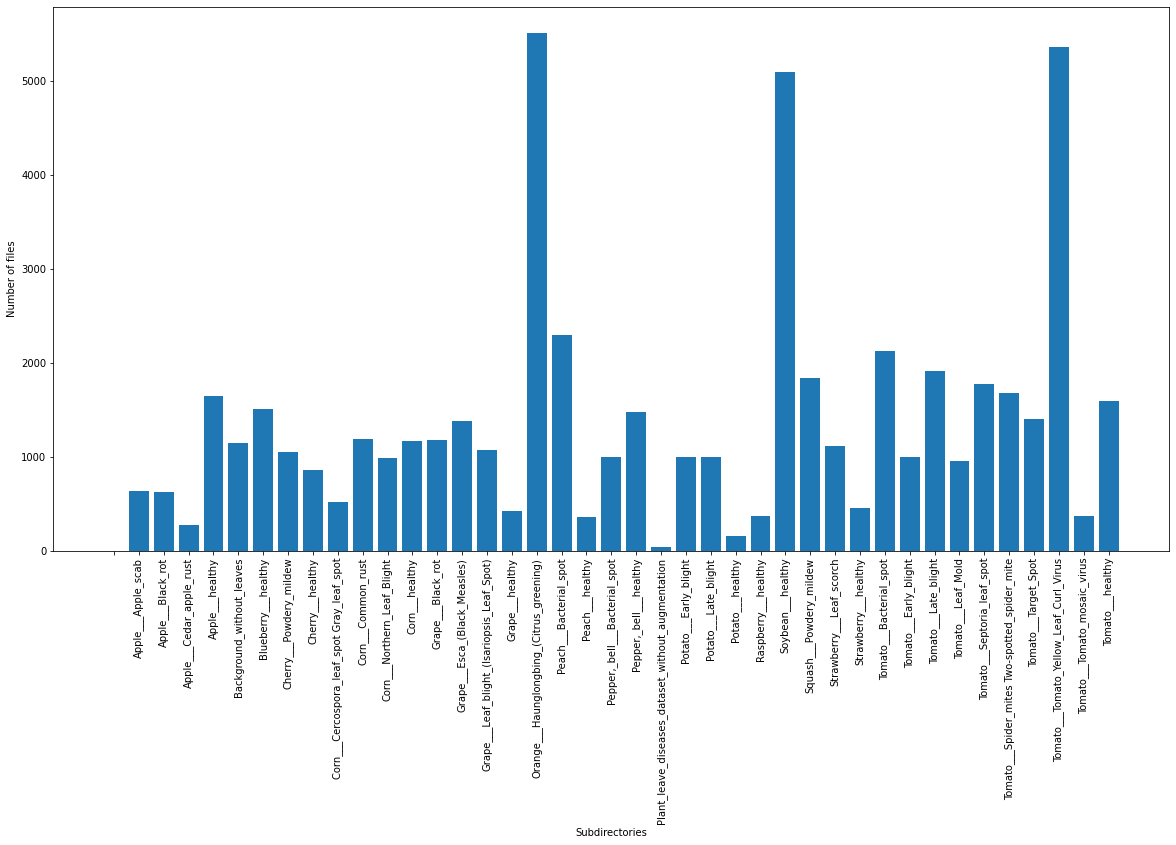

In [4]:
import matplotlib.pyplot as plt
sorted_keys = sorted(dir_count.keys())
plt.figure(figsize=(20, 10))
plt.bar(sorted_keys, [dir_count[key] for key in sorted_keys])
plt.xticks(rotation=90)
plt.xlabel('Subdirectories')
plt.ylabel('Number of files')
#
plt.show()

For our first Deep Learning try, I sampled 10 images from each folder.  Folders with the name "healthy" in them

In [15]:
from pathlib import Path
from zipfile import ZipFile
import random
"""
The script uses the ZipFile module to open the zip file specified by the zip_filepath and iterates through the directories.
For each directory name, it checks if the name contains a string from the dir_names list. 
If the directory includes one of the strings in dir_names, the script 
takes a random sample of 10 files from the directory and extracts them to the specified target directory.  The target directory will be identified as either 
healthy_target_dir or unhealthy_target_dir.
 The extracted files are also renamed to include the name of the plant species in the file name.

The zip file should be specified at zip_filepath, and the target directories for the healthy and unhealthy images should 
be specified at healthy_target_dir and unhealthy_target_dir respectively. The dir_names variable contains a list of names 
of the plant species to be considered.


"""


# specify the zip file and the target directory

zip_filepath = '/gdrive/MyDrive/Colab_datasets/Plant_leaf_diseases_dataset_without_augmentation.zip'
healthy_target_dir = '/content/healthy/'
unhealthy_target_dir = '/content/unhealthy/'
# Path.mkdir('/content/healthy')
dir_names = ["Apple","Grape","Pepper,_bell","Potato","Raspberry","Soybean","Strawberry"]
# open the zip file
with ZipFile(zip_filepath, 'r') as zip_ref:
    # iterate through the directories within the zip file
    for directory in (f for f in zip_ref.namelist() if f.endswith('/')):
      # Check if the directory name contains both an entry from the dir_names list as well as the word "healthy"
      if any(name in directory for name in dir_names):
        files = zip_ref.namelist()
        files = [file for file in files if directory in file]
        # take a random sample of files from the directory.
        files = random.sample(files,10)
        dir_path = Path(directory)
        subdir_name = dir_path.parts[-1]
        for name in dir_names:
           if name in subdir_name:
              short_dir_name = name
              break

        for file in files:
            zip_info = zip_ref.getinfo(file)
            zip_info.filename = zip_info.filename.replace("image",short_dir_name)
            zip_info.filename = Path(zip_info.filename).name
            if "healthy" in directory:
              target_dir = healthy_target_dir
            else:
              target_dir = unhealthy_target_dir
            zip_ref.extract(zip_info, target_dir)





Apple (272).JPG
Apple (110).JPG
Apple (556).JPG
Apple (251).JPG
Apple (513).JPG
Apple (121).JPG
Apple (484).JPG
Apple (182).JPG
Apple (238).JPG
Apple (292).JPG
Apple (87).JPG
Apple (335).JPG
Apple (471).JPG
Apple (328).JPG
Apple (557).JPG
Apple (217).JPG
Apple (281).JPG
Apple (62).JPG
Apple (331).JPG
Apple (121).JPG
Apple (194).JPG
Apple (14).JPG
Apple (206).JPG
Apple (78).JPG
Apple (242).JPG
Apple (190).JPG
Apple (251).JPG
Apple (77).JPG
Apple (217).JPG
Apple (2).JPG
Apple (1569).JPG
Apple (1255).JPG
Apple (444).JPG
Apple (1085).JPG
Apple (646).JPG
Apple (1542).JPG
Apple (573).JPG
Apple (1108).JPG
Apple (1087).JPG
Apple (460).JPG
Grape (409).JPG
Grape (892).JPG
Grape (1083).JPG
Grape (673).JPG
Grape (257).JPG
Grape (187).JPG
Grape (361).JPG
Grape (976).JPG
Grape (523).JPG
Grape (487).JPG
Grape (929).JPG
Grape (995).JPG
Grape (135).JPG
Grape (144).JPG
Grape (645).JPG
Grape (573).JPG
Grape (339).JPG
Grape (577).JPG
Grape (412).JPG
Grape (259).JPG
Grape (401).JPG
Grape (266).JPG
Grape (4